In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
car_data=pd.read_csv('Dataset05-Car_Price_Dataset.csv')
car_data.head()

,Unnamed: 0,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,city mpg,Popularity,MSRP
0,479,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,480,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,481,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,482,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,483,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [3]:
car_data.shape

(2112, 11)

In [4]:
car_data.columns

Index(['Unnamed: 0', 'Make', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Vehicle Size', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [5]:
car_data.dtypes

Unnamed: 0             int64
Make                  object
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Vehicle Size          object
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2112 non-null   int64  
 1   Make               2112 non-null   object 
 2   Engine Fuel Type   2112 non-null   object 
 3   Engine HP          2097 non-null   float64
 4   Engine Cylinders   2107 non-null   float64
 5   Transmission Type  2112 non-null   object 
 6   Driven_Wheels      2112 non-null   object 
 7   Vehicle Size       2112 non-null   object 
 8   city mpg           2112 non-null   int64  
 9   Popularity         2112 non-null   int64  
 10  MSRP               2112 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 181.6+ KB


In [7]:
car_data=car_data.drop(['Unnamed: 0'],axis=1)
car_data.head()

,Make,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,city mpg,Popularity,MSRP
0,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [8]:
car_data1=car_data.rename(columns={'Engine Fuel Type':'Fuel Type','Engine HP':'Power_HP','Engine Cylinders':'No.of Cylinder',
                                  'Transmission Type':"Transmission",'Vehice Size':'Vehicle_size','city mpg':'Milage_mpg'})
car_data1.head()

,Make,Fuel Type,Power_HP,No.of Cylinder,Transmission,Driven_Wheels,Vehicle Size,Milage_mpg,Popularity,MSRP
0,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,41365
1,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,rear wheel drive,Midsize,17,2031,35740
2,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,37615
3,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,34695
4,Toyota,regular unleaded,270.0,6.0,AUTOMATIC,four wheel drive,Midsize,17,2031,35725


In [9]:
car_data1=car_data1.drop_duplicates(subset=['Make','Fuel Type','Power_HP','No.of Cylinder','Transmission','Driven_Wheels','Vehicle Size','Milage_mpg','Popularity'],keep='first')

In [10]:
car_data1.shape

(406, 10)

In [13]:
car_data1.isnull().sum()

Make              0
Fuel Type         0
Power_HP          5
No.of Cylinder    2
Transmission      0
Driven_Wheels     0
Vehicle Size      0
Milage_mpg        0
Popularity        0
MSRP              0
dtype: int64

In [14]:
power_mean=car_data1['Power_HP'].mean()
power_mean

214.00498753117208

In [17]:
cylinder_mode=car_data1['No.of Cylinder'].mode()
cylinder_mode[0]

4.0

In [21]:
car_data1['Power_HP']=car_data1['Power_HP'].fillna(power_mean)
car_data1["No.of Cylinder"]=car_data1['No.of Cylinder'].fillna(cylinder_mode[0])

In [22]:
car_data1.isnull().sum()

Make              0
Fuel Type         0
Power_HP          0
No.of Cylinder    0
Transmission      0
Driven_Wheels     0
Vehicle Size      0
Milage_mpg        0
Popularity        0
MSRP              0
dtype: int64

# data analysis

In [24]:
car_data1.describe()

,Power_HP,No.of Cylinder,Milage_mpg,Popularity,MSRP
count,406.000000,406.000000,406.000000,406.000000,406.000000
mean,214.004988,5.295567,20.928571,3377.679803,25534.371921
std,84.009523,1.548023,10.734843,2121.244431,17135.324044
min,63.000000,0.000000,11.000000,873.000000,2000.000000
25%,154.250000,4.000000,15.000000,873.000000,18148.750000
50%,200.000000,5.000000,19.000000,2031.000000,25895.000000
75%,266.000000,6.000000,23.000000,5657.000000,32250.000000
max,662.000000,12.000000,126.000000,5657.000000,149995.000000


In [25]:
car_data1['Make'].value_counts()

Ford          184
Toyota        118
Volkswagen    104
Name: Make, dtype: int64

<Axes: >

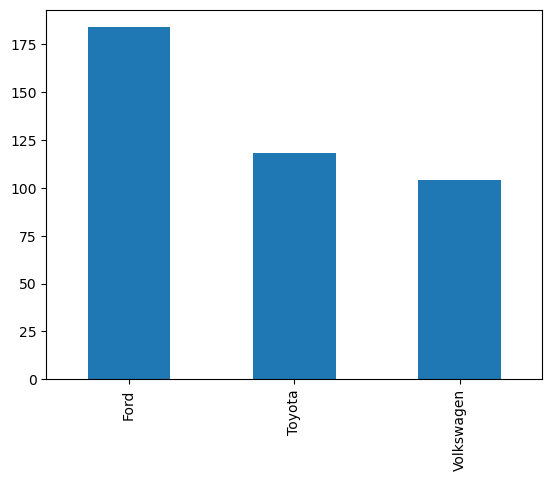

In [30]:
car_data1['Make'].value_counts().plot(kind='bar')

<Axes: >

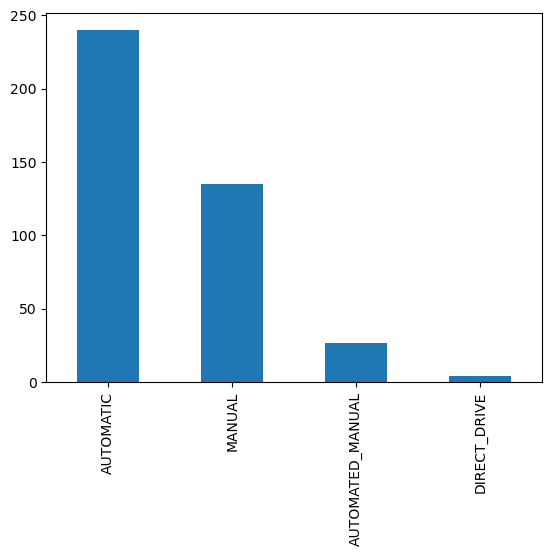

In [31]:
car_data1['Transmission'].value_counts().plot(kind='bar')

<Axes: >

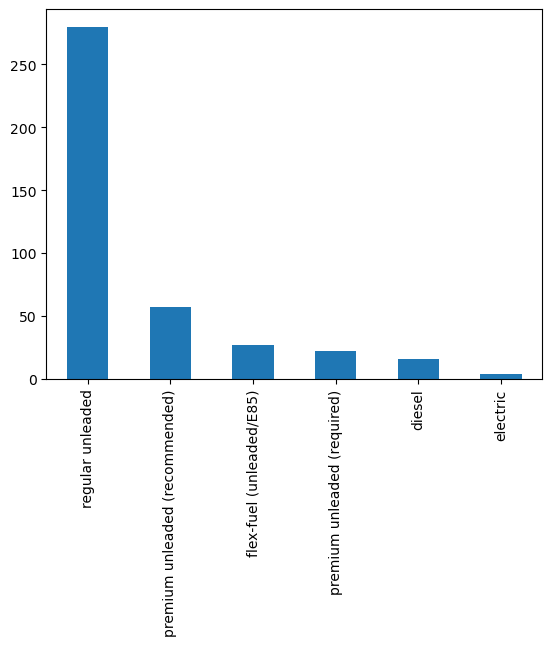

In [32]:
car_data1['Fuel Type'].value_counts().plot(kind='bar')

<Axes: >

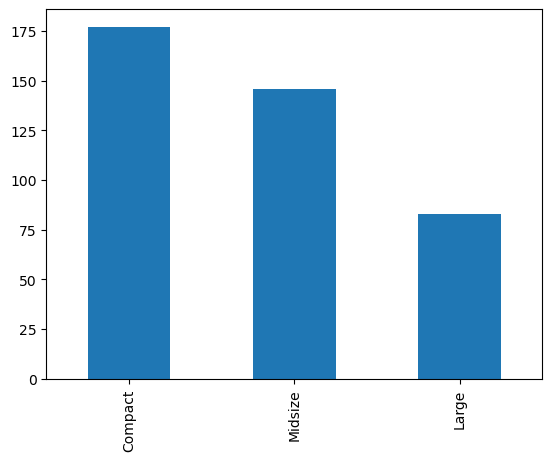

In [33]:
car_data1['Vehicle Size'].value_counts().plot(kind='bar')

<Axes: >

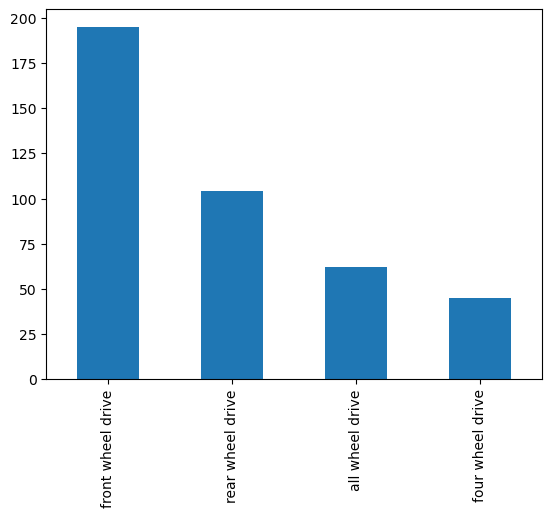

In [34]:
car_data1['Driven_Wheels'].value_counts().plot(kind='bar')

<Axes: ylabel='Frequency'>

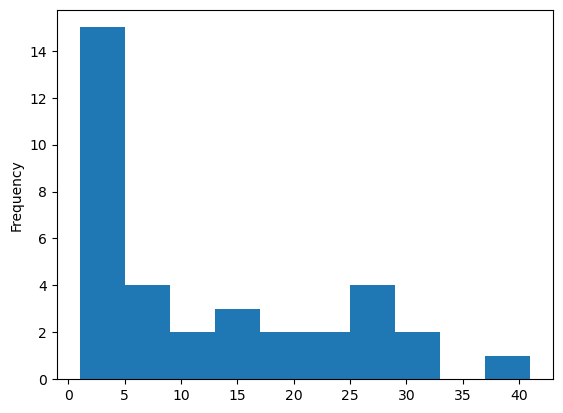

In [35]:
car_data1['Milage_mpg'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

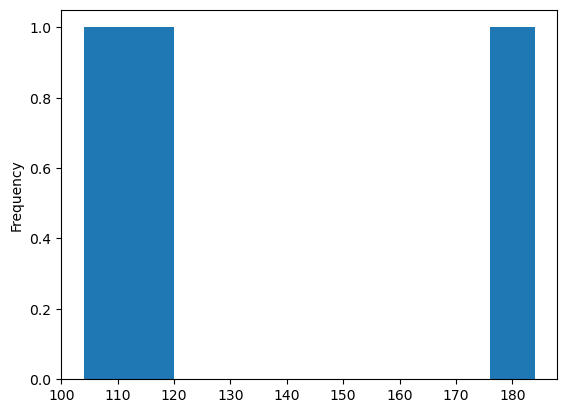

In [36]:
car_data1['Popularity'].value_counts().plot(kind='hist')

<Axes: ylabel='Frequency'>

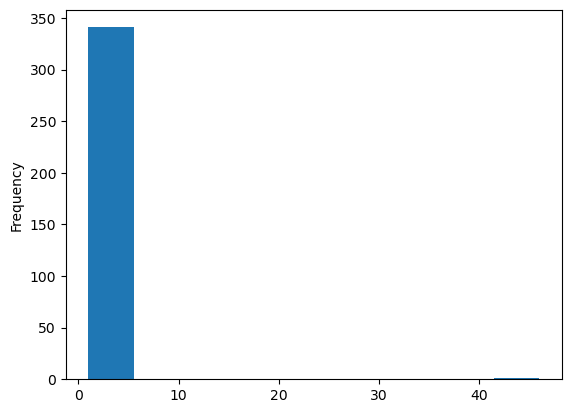

In [37]:
car_data1['MSRP'].value_counts().plot(kind='hist')

In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
car_data1['Make']=le.fit_transform(car_data1["Make"])
car_data1['Fuel Type']=le.fit_transform(car_data1["Fuel Type"])
car_data1['Transmission']=le.fit_transform(car_data1["Transmission"])
car_data1['Driven_Wheels']=le.fit_transform(car_data1["Driven_Wheels"])
car_data1['Vehicle Size']=le.fit_transform(car_data1["Vehicle Size"])

In [40]:
car_data1.head(10)

,Make,Fuel Type,Power_HP,No.of Cylinder,Transmission,Driven_Wheels,Vehicle Size,Milage_mpg,Popularity,MSRP
0,1,5,270.0,6.0,1,3,2,17,2031,41365
2,1,5,270.0,6.0,1,1,2,17,2031,37615
26,1,3,205.0,4.0,3,3,0,21,2031,26255
27,1,3,200.0,4.0,1,3,0,24,2031,26975
28,0,5,135.0,6.0,1,3,2,16,5657,2000
29,0,5,135.0,6.0,1,3,2,15,5657,2000
30,0,5,155.0,6.0,1,0,1,14,5657,2000
31,0,5,135.0,6.0,1,3,1,15,5657,2000
32,0,5,140.0,6.0,1,3,2,15,5657,2000
33,0,5,155.0,6.0,1,0,1,13,5657,2000


In [41]:
x=car_data1.drop(['MSRP'],axis=1)
y=car_data1["MSRP"]

In [42]:
x

,Make,Fuel Type,Power_HP,No.of Cylinder,Transmission,Driven_Wheels,Vehicle Size,Milage_mpg,Popularity
0,1,5,270.0,6.0,1,3,2,17,2031
2,1,5,270.0,6.0,1,1,2,17,2031
26,1,3,205.0,4.0,3,3,0,21,2031
27,1,3,200.0,4.0,1,3,0,24,2031
28,0,5,135.0,6.0,1,3,2,16,5657
...,...,...,...,...,...,...,...,...,...
2048,1,5,181.0,4.0,1,0,2,20,2031
2068,0,5,200.0,6.0,1,2,2,16,5657
2089,1,5,106.0,4.0,3,2,0,30,2031
2090,1,5,106.0,4.0,1,2,0,32,2031


In [43]:
y

0       41365
2       37615
26      26255
27      26975
28       2000
        ...  
2048    32960
2068    20220
2089    15950
2090    17050
2092    16880
Name: MSRP, Length: 406, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [48]:
x['Milage_mpg']=std.fit_transform(x[['Milage_mpg']])
x['Power_HP']=std.fit_transform(x[['Power_HP']])
x['No.of Cylinder']=std.fit_transform(x[['No.of Cylinder']])
x['Popularity']=std.fit_transform(x[['Popularity']])

In [49]:
x.head()

,Make,Fuel Type,Power_HP,No.of Cylinder,Transmission,Driven_Wheels,Vehicle Size,Milage_mpg,Popularity
0,1,5,0.667354,0.455615,1,3,2,-0.366416,-0.635637
2,1,5,0.667354,0.455615,1,1,2,-0.366416,-0.635637
26,1,3,-0.107322,-0.837949,3,3,0,0.006662,-0.635637
27,1,3,-0.166913,-0.837949,1,3,0,0.286471,-0.635637
28,0,5,-0.941589,0.455615,1,3,2,-0.459686,1.075846


In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [56]:
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_preds=lr.predict(x_test)
y_preds

array([17696.34293378, 47898.92991269, 27279.77160584, 12110.02605603,
       14736.33634455, 17069.60239433,  9895.12510163, 43413.91124172,
       50707.73151681, 49430.00706852,  6051.62765212, 20055.78042648,
       10704.70527485, 30160.68791054, 47906.93903504, 50318.82692658,
       29004.35387017, 22634.63440392, 13201.45778472, 26037.77993495,
       46577.04640761, 25719.04813155,  8523.47215759, 23862.23849103,
       59319.01440115, 40856.05573194, 13885.16769577, 24455.38185498,
       22831.47978831, 30909.66685326, 10203.76372788, 23205.65871815,
       31062.04822529, 23858.90425632, 10970.40091317, 27786.88155043,
       17861.03301187, 44165.34743808,  3339.44530823, 47440.01179142,
       24722.90179336, 21465.07645767, 49819.90400694,  6355.08891651,
       37386.54292689, 16975.387007  , 25899.3359846 , 26399.1457536 ,
       18834.75872636, 17709.50335027, 21501.96099789, 22017.35715142,
       25410.27611937, 25652.61591573, 50597.61403965, 20540.12919389,
      

In [58]:
from sklearn.metrics import r2_score,mean_squared_error

In [59]:
r2_score(y_test,y_preds)

0.6725063381709796

In [60]:
mse=mean_squared_error(y_test,y_preds)
mse

100846023.63454328

In [61]:
rmse=mse**0.5
rmse

10042.21208870552

In [62]:
lr.coef_

array([ 2220.37562121, -1052.53408275, 14675.62688213, -2195.20599726,
       -2411.69896953, -2152.6798441 , -1037.63996281,  3309.10449358,
       -1044.23995283])

In [63]:
lr.intercept_

36804.44203649929